### 本篇目錄

0.前言

1.資料預處理

2.模型建構(mxnet)

DNN

- Build Model
- Train Model
- Prediction

CNN

- Build Model
- Train Model
- Prediction

3.總結

4.Reference

### ※ Kaggle－Digit Recognizer：https://www.kaggle.com/c/digit-recognizer

### 0. 前言

這篇筆記主要介紹：「用Python實作出深度學習的模型，解決Kaggle上的手寫數字問題(Digit Recognizer)」

重點會著重在「如何用Python撰寫深度學習的模型」，因此並不會詳細講述深度學習(DNN, CNN)的細節。文末有提供一些相關資源，可以自行去學習。

1998年，被稱為「卷積類神經之父」的 揚·勒丘恩(Yann LeCun) 提出手寫數字的問題。
當時公開的資料集MNIST是根據他所在的實驗室(Mixed National Institute of Standards and Technology)所命名，目的要開發出一個自動辨識系統。

當時 揚 已經提出**LeNet**這個卷積類神經網路(CNN: Convolutional Neural Networks)，來解決這個問題。當年美國大多數的銀行，就是用它來識別支票上的數字。

2007年，NVIDIA開發出GPU(Graphics Processing Unit)，比一般CPU處理速度快千倍，各種「深度學習」的演算法因而在各領域獲得飛躍性的進展(無人車、人工智慧…)。

「MNIST之於深度學習，如同Hello World!之於程式設計。」

R有很多可以實現深度學習/類神經網路的套件(neuralnet、nnet、h2o、mxnet)
而這次，我選擇mxnet套件建構以下模型：

- 深度神經網路(DNN: Deep Neuron Networks)

- 卷積類神經網路(CNN: Convolutional Neural Networks)


### 1. 資料預處理

關於Digit Recognizer這個問題，在文章開頭的連結內有詳細說明，同時可以下載到訓練和測試資料集：

train.csv：42000 * 785 (label + 28 * 28 pixels)

test.csv：28000 * 784 (28 * 28 pixels)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_train[22]

9

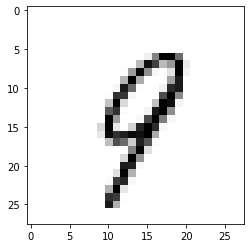

In [4]:
plt.imshow(x_train[22],cmap="Greys")

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### DNN

所謂的DNN，就是「多層隱藏層」的類神經網路。
一般來說，類神經網路的基本型為[筆記(8)](https://rpubs.com/skydome20/R-Note8-ANN)介紹的「倒傳遞類神經網路(BPN)」。

然而，單層或雙層的BPN，在面對大數據(Big Data)的議題上，其預測效果和處理效率沒有想像中的好(尤其是圖片處理、影音處理、語音處理…)，

因此有人提倡引入多層隱藏層，擴展神經網路的「深度」：現在的隱藏層萃取出「input的一些特徵」後，當作下一隱藏層的input。隨著層數越多，能夠辨識的「特徵」也會越明確。以此概念來增加最後的預測效果。

不過隨著隱藏層增加，許多問題也會接踵而來：「梯度殘差消失」、「權重數量遞增」…
因此又有人接著提出「激發函數改為relu」、「Dropout概念」、「min batch」…等想法來解決這些問題。

關於DNN的詳情，這裡不多加贅述，可以參照台大李宏毅老師的講義： [一天搞懂深度學習。](http://www.slideshare.net/tw_dsconf/ss-62245351)

### Build Model

In [8]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64 , activation='relu'))
model.add(Dense(10 , activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.05), metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


【註】
因為輸出層的結果是類別型態(0~9的數字)，因此最後一行使用的是softmax。
若現在要預測的是連續型態，就不用

就是這麼簡單。

透過一行一行不同功能的函式，自行設計屬於自己的深度學習模型，是一種相當具有彈性的寫法。

最後，我創造了一個具有兩層隱藏層(500, 400)，搭配激發函數Relu，以及引入Dropout概念的類神經網路。

我們可以看網路中的參數資訊，以及視覺化其結構

In [9]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 1.2760 - accuracy: 0.5739
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.8512
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8755
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8926
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8972
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.9053
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3009 - accuracy: 0.9104
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2861 - accuracy: 0.9125
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.9155
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9200

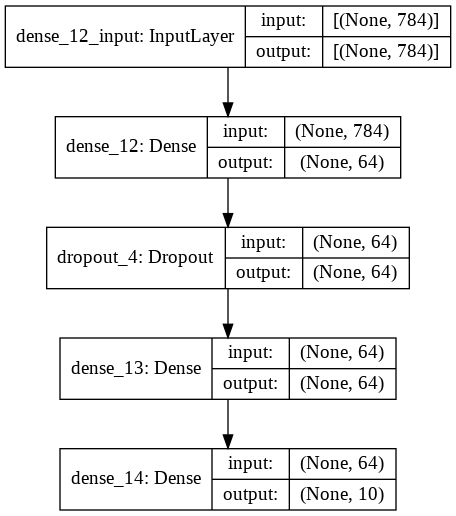

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

大部分的參數都和基本的BPN概念一樣，就不多加解釋。

但其中有一個參數值得關注，那就是倒數第三個的參數：eval.metric。

因為我使用的是mx.metric.accuracy，用來評估「預測的準確率」，所以在訓練模型時的輸出才會是Train-accuracy。
如果現在要評估「連續數值」的預測效果，可以改使用mx.metric.mae、mx.metric.rmse，這樣就會用MSE愈小愈好的方式來訓練模型。

但最棒的是，如果自己有特殊需求(例如，我想看的是R-Squared)，mxnet允許我們可以自行設計屬於自己的評估函式，再將參數設定成： eval.metric = my.eval.metric就好

In [11]:
result = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
accuracy_score(y_test,result)

0.9629

In [13]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.98      0.94      0.96       892
           6       0.96      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### CNN

在研究CNN時，會發現許多公司(Google、Microsoft…)提出各自的結構。其中沒有好壞之分，端看使用者是如何設計，滿足各自的需求。

CNN詳細的演算法和設計結構不在這裡贅述，可以參考以下這些文章：

- [Visualizing CNN architectures side by side with mxnet](https://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/)

- [CS231n: Convolutional Neural Networks for Visual Recognition.](https://cs231n.github.io/convolutional-networks/)

### Build Model

我將實作的是 揚·勒丘恩 1998年所提出的CNN：LeNet：

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R12/0.png)

In [14]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1) /255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [14]:
model = Sequential()
#1
model.add(Conv2D(20, (5,5),padding="same",
                 input_shape=(28,28,1),
                 activation="tanh"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#2
model.add(Conv2D(50, (5,5), padding="same",
                 activation="tanh"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#flatten
model.add(Flatten())
model.add(Dense(500,activation="tanh"))
model.add(Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [16]:
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=0.007),
              metrics=["accuracy"])

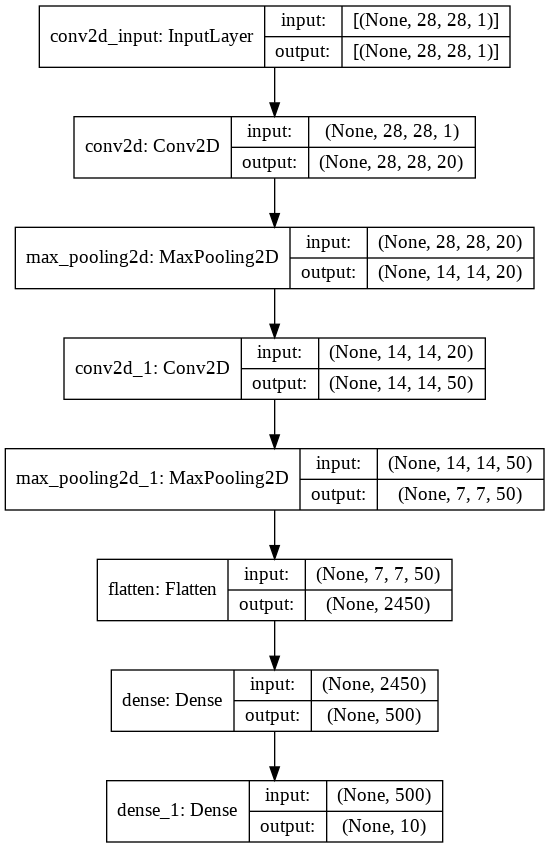

In [17]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Train Model
然而，在訓練之前有一件事情要注意，因為LeNet有要求既定的input格式()，和DNN不一樣，我們不能直接拿train.x來訓練，得先將train.x和test.x轉換成一個四維矩陣，才能進行訓練：

In [18]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
469/469 [==============================] - 8s 4ms/step - loss: 1.6869 - accuracy: 0.5654
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4054 - accuracy: 0.8936
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2950 - accuracy: 0.9165
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2400 - accuracy: 0.9318
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2100 - accuracy: 0.9412
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1812 - accuracy: 0.9488
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1614 - accuracy: 0.9545
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9594
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1317 - accuracy: 0.9624
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1222 - accuracy: 0.9649

In [19]:
result = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
accuracy_score(y_test,result)

0.9823

In [21]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Reference
- [政大蔡炎龍老師 ： 成為 Python AI 深度學習達人的第一堂課](http://moocs.nccu.edu.tw/course/172/intro)
- [Youtube : Deep Learning and the Future of AI | Yann LeCun | Talk](https://www.youtube.com/watch?v=_1Cyyt-4-n8&ab_channel=SoftBankRoboticsEurope)
- [Github-mxnet](https://github.com/apache/incubator-mxnet)
- [台大李宏毅老師 : 一天搞懂深度學習](http://www.slideshare.net/tw_dsconf/ss-62245351)
- [揚·勒丘恩(Yann LeCun) : LeNet-5](http://yann.lecun.com/exdb/lenet/)
- [CS231n: Convolutional Neural Networks for Visual Recognition.](http://cs231n.github.io/convolutional-networks/)
- http://blog.csdn.net/zouxy09/article/details/8775518
- [史丹佛CS224d深度學習課程第八彈： RNN，MV-RNN與RNTN](http://www.gegugu.com/2016/08/12/2372.html)